In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
import numpy as np
import matplotlib.pyplot as plt
from atomrdf import KnowledgeGraph, System

In [3]:
project = 'sf4'
pr = Project(project)
kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

In [4]:
struct = pr.create.structure.annotated_structure.bulk('Cu')

In [5]:
refjob = pr.create.job.Lammps('reflmp')
refjob.structure = struct
refjob.potential = '2009--Mendelev-M-I--Cu-Zr--LAMMPS--ipr1'

In [6]:
phono = pr.create.job.PhonopyJob('phono')
phono.ref_job = refjob

In [7]:
quasi = pr.create.job.QuasiHarmonicJob('quasi')
quasi.ref_job = phono

In [8]:
quasi.input["temperature_end"] = 500
quasi.input["temperature_steps"] = 3
quasi.input["axes"]=["x","y","z"]
quasi.input["strains"] = None

In [9]:
quasi.run()

The job quasi was saved and received the ID: 350
The job quasi_0_9 was saved and received the ID: 351
The job reflmp_0 was saved and received the ID: 352
The job quasi_0_92 was saved and received the ID: 353
The job reflmp_0 was saved and received the ID: 354
The job quasi_0_94 was saved and received the ID: 355
The job reflmp_0 was saved and received the ID: 356
The job quasi_0_96 was saved and received the ID: 357
The job reflmp_0 was saved and received the ID: 358
The job quasi_0_98 was saved and received the ID: 359
The job reflmp_0 was saved and received the ID: 360
The job quasi_1_0 was saved and received the ID: 361
The job reflmp_0 was saved and received the ID: 362
The job quasi_1_02 was saved and received the ID: 363
The job reflmp_0 was saved and received the ID: 364
The job quasi_1_04 was saved and received the ID: 365
The job reflmp_0 was saved and received the ID: 366
The job quasi_1_06 was saved and received the ID: 367
The job reflmp_0 was saved and received the ID: 368

In [10]:
kg.add_workflow(quasi, workflow_environment='pyiron')

/home/srmnitc/miniconda3/envs/workflow-rdf/lib/python3.11/site-packages/atomrdf/graph.py:376: UserWarning: asmo:hasValue has a range with unspecified datatype!
  warnings.warn(f"{triple[1].name} has a range with unspecified datatype!")


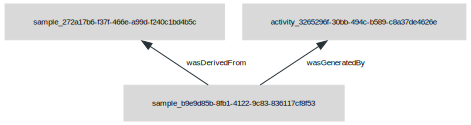

In [13]:
kg.visualise(sample_view=True, layout='dot')

In [14]:
kg.samples

[sample:272a17b6-f37f-466e-a99d-f240c1bd4b5c,
 sample:b9e9d85b-8fb1-4122-9c83-836117cf8f53_from_sample:272a17b6-f37f-466e-a99d-f240c1bd4b5c]

In [16]:
sample = kg.samples[1]

In [19]:
sample.outputs.QuasiHarmonicTemperature

[  0. 250. 500.] K

In [30]:
sample.outputs.QuasiHarmonicFreeEnergy

[[ 1.414e-01  1.390e-01  1.360e-01  1.328e-01  1.292e-01  1.255e-01
   1.230e-01  1.207e-01  1.186e-01  1.170e-01  1.155e-01]
 [ 2.560e-02  2.100e-02  1.490e-02  7.800e-03 -4.000e-04 -9.400e-03
  -1.630e-02 -2.250e-02 -2.850e-02 -3.320e-02 -3.710e-02]
 [-3.276e-01 -3.361e-01 -3.475e-01 -3.609e-01 -3.764e-01 -3.934e-01
  -4.066e-01 -4.186e-01 -4.302e-01 -4.392e-01 -4.467e-01]] EV